Citations:

[1][Using kaggle api to retrieve datasets](https://stackoverflow.com/questions/56816537/cant-find-kaggle-json-file-in-google-colab)

[2][Appending image files from directory to a list](https://stackoverflow.com/questions/63167612/python-understanding-os-listdir-method)

[3][Displaying an image from directory & Converting images to arrays](https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/)

[4][KNN algorithm documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[5][PCA algorithm documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

[6][NCA algorithm documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NeighborhoodComponentsAnalysis.html)

In [ ]:
#settup kaggle directory and access kaggle api through access token [1]

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
import json
import pandas as pd
import numpy as np
import os


api_token = {"username":"johng09","key":"b2405d722d32069b85b16350373479da"}
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle -v

#retrieve database
!kaggle competitions download galaxy-zoo-the-galaxy-challenge


Kaggle API 1.5.12
100% 1.77G/1.77G [00:17<00:00, 111MB/s] 
100% 1.77G/1.77G [00:17<00:00, 109MB/s]


In [ ]:
!ls

all_ones_benchmark.zip		     images_training_rev1
all_zeros_benchmark.zip		     images_training_rev1.zip
central_pixel_benchmark.zip	     sample_data
galaxy-zoo-the-galaxy-challenge.zip  training_solutions_rev1.csv
images_test_rev1.zip		     training_solutions_rev1.zip


In [ ]:
!ls 
!unzip galaxy-zoo-the-galaxy-challenge.zip

###unzip all labels to be used
!unzip images_training_rev1.zip
###unzip all data to be used
!unzip training_solutions_rev1.zip

#!unzip images_test_rev1.zip ###cannot use testing data; lack of testing labels


In [ ]:

####retrieve solutions
solutions_df = pd.read_csv('training_solutions_rev1.csv')
#path to folder of images in directory
data_path = 'images_training_rev1/' 
###retrieve image data files [2]
data_files = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path,f))]
#data sample size
sample_size = 10000
###array of image paths; '(home folder path) + (data file name)'
image_paths = [str(data_path + data_files[data_files.index(str(solutions_df.GalaxyID[i]) + '.jpg')]) for i in range(sample_size)]
#image_paths = [str(data_path + filename) for filename in data_files]


In [ ]:
solutions_df[:sample_size]

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.000000,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.000000,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.000000,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,248461,0.083000,0.889000,0.028000,0.000000,0.889000,0.055118,0.833882,0.861441,0.027559,...,0.000000,0.305812,0.444504,0.111126,0.000000,0.027566,0.000000,0.222252,0.305812,0.305812
9996,248466,0.439049,0.527396,0.033555,0.000000,0.527396,0.000000,0.527396,0.298742,0.228654,...,0.000000,0.298742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.298742
9997,248470,0.256421,0.737000,0.006579,0.038667,0.698333,0.000000,0.698333,0.217351,0.480982,...,0.000000,0.172379,0.044973,0.000000,0.000000,0.000000,0.077471,0.000000,0.000000,0.139880
9998,248471,0.796456,0.203544,0.000000,0.000000,0.203544,0.000000,0.203544,0.000000,0.203544,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
###select 2 columns from dataframe & subset of dataframe = sample_size
categories = np.array(solutions_df[['Class1.1','Class1.2']][:sample_size])
###assign labels
labels = [np.argmax(x) for x in categories]

#print(labels[0]) ###expected = 1
#print(np.shape(labels))

print("Labels: ", np.unique(labels))
print("Zeros: ", labels.count(0))
print("Ones: ", labels.count(1))



Labels:  [0 1]
Zeros:  4392
Ones:  5608


In [ ]:
####PREVIOUS LABELING PROCESS;#######
###THESE LABELS ARENT USED BECAUSE OF THE UNDERREPRESENTATION OF CLASS1.3 (LABELED AS '2')
###select 3 columns from dataframe & subset of dataframe = sample_size
categories_ = np.array(solutions_df[['Class1.1','Class1.2','Class1.3']][:sample_size])
###assign labels
labels_ = [np.argmax(x) for x in categories_]

#print(labels[0]) ###expected = 1
#print(np.shape(labels))

print("Labels: ", np.unique(labels_))
print("Zeros: ", labels.count(0))
print("Ones: ", labels.count(1))
print("Twos: ", labels.count(2))



Labels:  [0 1 2]
Zeros:  4392
Ones:  5608
Twos:  0


In [ ]:
print(image_paths[0])
print(solutions_df.GalaxyID[0])

images_training_rev1/100008.jpg
100008


In [ ]:
import cv2
###function that takes the dir path of image as parameter and converts image to a vector[3] 
###if flag == 0, image remains colored and convert image to vector
###if flag == 1, image convert to other colorspace and convert image to vector  
def image_to_array(img_path,flag):
  img = cv2.imread(img_path)
  img_resized = cv2.resize(img,(64,64))
  if flag == 1:
    img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    
  return np.array(img_resized.flatten())

(424, 424, 3)
(64, 64, 3)


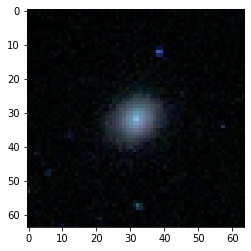

In [ ]:
img = cv2.imread(image_paths[0])
img_resized = cv2.resize(img,(64,64))
print(np.shape(img))
print(np.shape(img_resized))

from matplotlib import pyplot as plt
plt.imshow(img_resized)



In [ ]:
###call on image_to_array() method to convert images in directory to vectors and save to array
image_vectors_color = [image_to_array(img_path,0) for img_path in image_paths]
image_vectors_grey = [image_to_array(img_path,1) for img_path in image_paths]



In [ ]:
print(np.shape(image_vectors_color[0]))
print(np.shape(image_vectors_grey[0]))

(12288,)
(4096,)


In [ ]:
from sklearn.model_selection import train_test_split
###split image_vectors_color and labels into training and testing sets: 80/20 split
train_X_color,test_X_color,train_Y_color,test_Y_color = train_test_split(image_vectors_color,labels,test_size=.3)
###split image_vectors_grey and labels into training and esting sets: 80/20 split
train_X_grey,test_X_grey,train_Y_grey,test_Y_grey = train_test_split(image_vectors_grey,labels,test_size=.3)



In [ ]:
train_X_color_norm = np.array(train_X_color).astype(float)/255
test_X_color_norm = np.array(test_X_color).astype(float)/255

train_X_grey_norm = np.array(train_X_grey).astype(float)/255
test_X_grey_norm = np.array(test_X_grey).astype(float)/255

In [ ]:
###display first 10 training/test
print("First 10 training labels:\t",train_Y_color[:10])
print("First 10 testing labels:\t",test_Y_color[:10])

First 10 training labels:	 [0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
First 10 testing labels:	 [0, 1, 0, 1, 1, 1, 0, 0, 0, 1]


Shape of test_X:	 (3000, 12288)
Shape of train_X:	 (7000, 12288)


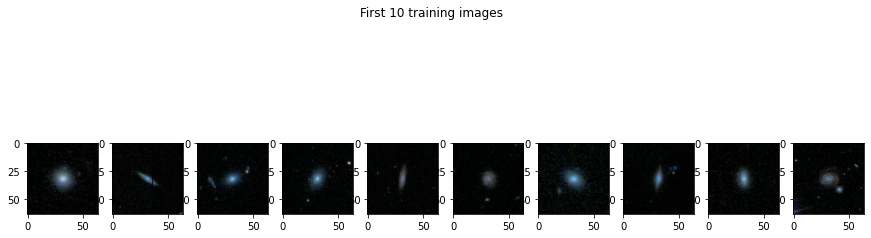

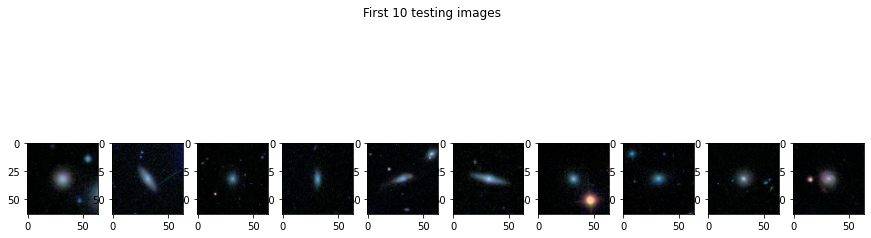

In [ ]:
####display images in colored set
from matplotlib import pyplot as plt
###display first 10 training images
fig, ax = plt.subplots(1, 10, figsize=(15, 5))
fig.suptitle("First 10 training images")
for i in range(10):
  ax[i].imshow(train_X_color[i].reshape(64,64,3))

###display first 10 testing images
fig1,ax1 = plt.subplots(1, 10, figsize=(15, 5))
fig1.suptitle("First 10 testing images")
for i in range(10):
  ax1[i].imshow(test_X_color[i].reshape(64,64,3))

print("Shape of test_X:\t",np.shape(test_X_color))
print("Shape of train_X:\t",np.shape(train_X_color))


Shape of test_X:	 (3000, 4096)
Shape of train_X:	 (7000, 4096)


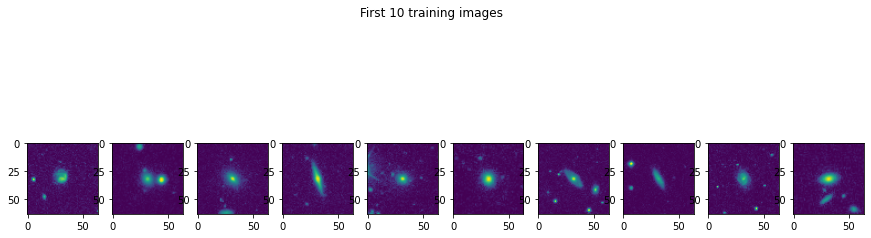

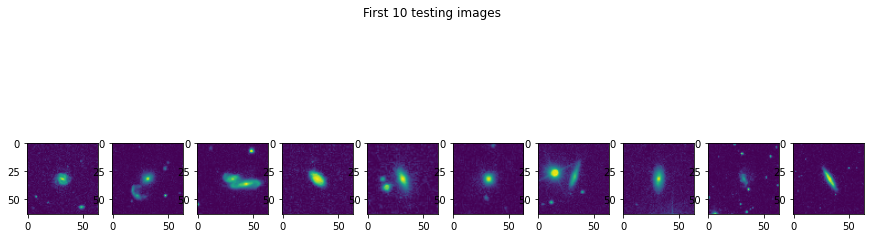

In [ ]:
####display images in grey set
from matplotlib import pyplot as plt
###display first 10 training images
fig, ax = plt.subplots(1, 10, figsize=(15, 5))
fig.suptitle("First 10 training images")
for i in range(10):
  ax[i].imshow(train_X_grey[i].reshape(64,64))

###display first 10 testing images
fig1,ax1 = plt.subplots(1, 10, figsize=(15, 5))
fig1.suptitle("First 10 testing images")
for i in range(10):
  ax1[i].imshow(test_X_grey[i].reshape(64,64))

print("Shape of test_X:\t",np.shape(test_X_grey))
print("Shape of train_X:\t",np.shape(train_X_grey))

Details of first 10 training image datapoints

In [ ]:
####display image vectors in colored set

#display training vectors
print("********* Training vectors ********* \n")
for i in range(10):
  print(train_X_color_norm[i])
  print("Vector Shape:\t", np.shape(train_X_color_norm[i]),"\n")

#display 10 testing vectors

print("********* Testing vectors ********* \n")
for i in range(10):
  print(test_X_color_norm[i])
  print("Vector Shape:\t", np.shape(test_X_color_norm[i]),"\n")

********* Training vectors ********* 

[0.03137255 0.03921569 0.03921569 ... 0.00392157 0.00392157 0.00392157]
Vector Shape:	 (12288,) 

[0.02352941 0.01568627 0.01176471 ... 0.23137255 0.05098039 0.0745098 ]
Vector Shape:	 (12288,) 

[0.00392157 0.01176471 0.01176471 ... 0.01960784 0.02745098 0.02745098]
Vector Shape:	 (12288,) 

[0.01568627 0.02352941 0.02352941 ... 0.01176471 0.01960784 0.01960784]
Vector Shape:	 (12288,) 

[0.01176471 0.01176471 0.01176471 ... 0.         0.         0.        ]
Vector Shape:	 (12288,) 

[0.00392157 0.01176471 0.01176471 ... 0.         0.01176471 0.00392157]
Vector Shape:	 (12288,) 

[0.01176471 0.01960784 0.01960784 ... 0.01960784 0.03137255 0.05098039]
Vector Shape:	 (12288,) 

[0.03137255 0.03921569 0.04313725 ... 0.00784314 0.03921569 0.09803922]
Vector Shape:	 (12288,) 

[0.         0.         0.         ... 0.01568627 0.02352941 0.02352941]
Vector Shape:	 (12288,) 

[0.00392157 0.01176471 0.01568627 ... 0.00392157 0.00784314 0.00784314]
Vector 

Details of first 10 testing datapoints

In [ ]:
####display image vectors in grey set

#display training vectors
print("********* Training vectors ********* \n")
for i in range(10):
  print(train_X_grey_norm[i])
  print("Vector Shape:\t", np.shape(train_X_grey_norm[i]),"\n")

#display 10 testing vectors

print("********* Testing vectors ********* \n")
for i in range(10):
  print(test_X_grey_norm[i])
  print("Vector Shape:\t", np.shape(test_X_grey_norm[i]),"\n")

********* Training vectors ********* 

[0.03529412 0.00784314 0.04705882 ... 0.04313725 0.02745098 0.03137255]
Vector Shape:	 (4096,) 

[0.00784314 0.         0.00784314 ... 0.00392157 0.00392157 0.00392157]
Vector Shape:	 (4096,) 

[0.02745098 0.03529412 0.00392157 ... 0.00392157 0.02352941 0.00784314]
Vector Shape:	 (4096,) 

[0.02352941 0.01176471 0.00392157 ... 0.02352941 0.02352941 0.01960784]
Vector Shape:	 (4096,) 

[0.03921569 0.0627451  0.05098039 ... 0.02352941 0.01176471 0.00784314]
Vector Shape:	 (4096,) 

[0.01176471 0.02352941 0.01176471 ... 0.01568627 0.01176471 0.01568627]
Vector Shape:	 (4096,) 

[0.01176471 0.01960784 0.01176471 ... 0.00784314 0.04313725 0.00784314]
Vector Shape:	 (4096,) 

[0.00784314 0.01176471 0.02352941 ... 0.00392157 0.05490196 0.02745098]
Vector Shape:	 (4096,) 

[0.01568627 0.00784314 0.01960784 ... 0.00784314 0.00784314 0.00784314]
Vector Shape:	 (4096,) 

[0.00392157 0.00392157 0.00784314 ... 0.03921569 0.01176471 0.00392157]
Vector Shape:	 (

(64, 64)


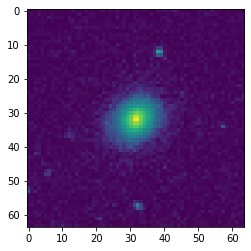

In [ ]:
###experiment code
from PIL import Image
import cv2
#display first training image [3]
img = cv2.imread(image_paths[0])
img_resized = cv2.resize(img,(64,64)) ###potential error
gray_img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
print(np.shape(gray_img))

from matplotlib import pyplot as plt
plt.imshow(gray_img)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA #[5]

def minimize_pca(data,n):

  ###standardize data
  ##scaler = StandardScaler()
  ##scaler.fit(data)
  ##data_scaled = scaler.transform(data)
  ##data_scaled = scaler.transform(data)

  ###implement pca on data
  pca = PCA(n_components = n)
  ##pca.fit(data_scaled)
  pca.fit(data)
  ##minimized = pca.transform(data_scaled)
  minimized = pca.transform(data)
  return minimized





In [ ]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis #[6]
def minimize_nca(data,labels,n):
  ###standardize data
  ##scaler = StandardScaler()
  ##scaler.fit(data)
  ##data_scaled = scaler.transform(data)
  ##data_scaled = scaler.transform(data)

  nca = NeighborhoodComponentsAnalysis(n_components=n)
  #nca.fit(data_scaled,labels)
  nca.fit(data,labels)
  minimized = nca.transform(data)

  return minimized

In [ ]:

from sklearn.neighbors import KNeighborsClassifier #[4]
from sklearn.metrics import confusion_matrix
def predict_knn(testing_data,training_data,testing_labels,training_labels):
  
  ###setup k neighbors & fit algorithm to data
  classifier = KNeighborsClassifier(n_neighbors = 9)
  classifier.fit(training_data,training_labels)

  ###generate predictions on test data
  predictions = classifier.predict(testing_data)
  ###truth labels
  actual = testing_labels

  ###evaluate knn algorithm
  cm = confusion_matrix(actual,predictions)
  accuracy = np.sum(np.equal(actual,predictions))/len(actual)
  print("Accuracy: ", accuracy )
  plt.imshow(cm)

In [ ]:
data_minimized = minimize_pca(train_X_color,30)
print(np.shape(data_minimized))

(7000, 30)


Implementing PCA-KNN

Minimizing PCA execution time (seconds):  13.30554485321045
Accuracy:  0.731
KNN execution time (seconds):  0.512768030166626


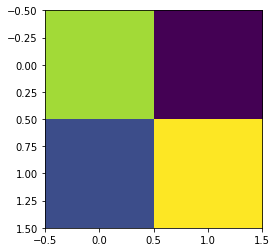

In [ ]:
import time

###implement both pca and knn on colored vectors

#minimize training and testing sets
t_start = time.time()
train_X_min = minimize_pca(train_X_color_norm,30)
test_X_min = minimize_pca(test_X_color_norm,30)
t_end = time.time()
print("Minimizing PCA execution time (seconds): ", t_end - t_start)
t_start = time.time()
predict_knn(test_X_min,train_X_min,test_Y_color,train_Y_color)
t_end = time.time()

print("KNN execution time (seconds): ", t_end - t_start)



Minimizing PCA execution time (seconds):  4.171270132064819
Accuracy:  0.638
Algorithm execution time (seconds):  0.4801456928253174


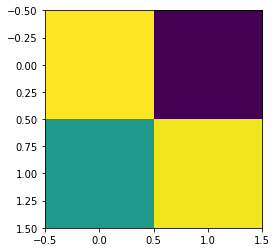

In [ ]:
###implement both pca and knn on grey vectors

#minimize training and testing sets
t_start = time.time()
train_X_min = minimize_pca(train_X_grey_norm,30)
test_X_min = minimize_pca(test_X_grey_norm,30)
t_end = time.time()
print("Minimizing PCA execution time (seconds): ", t_end - t_start)

t_start = time.time()
predict_knn(test_X_min,train_X_min,test_Y_grey,train_Y_grey)
t_end = time.time()

print("Algorithm execution time (seconds): ", t_end - t_start)


Minimizing NCA execution time (seconds):  272.4741005897522
Accuracy:  0.63
KNN execution time (seconds):  0.555718183517456


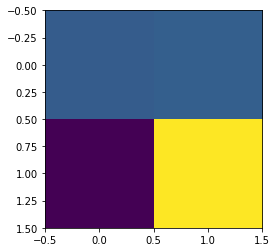

In [ ]:
###implement both nca and knn on colored set
t_start = time.time()
train_X_min = minimize_nca(train_X_color_norm,train_Y_color,30)
test_X_min = minimize_nca(test_X_color_norm,test_Y_color,30)
t_end = time.time()
print("Minimizing NCA execution time (seconds): ", t_end - t_start)

t_start = time.time()
predict_knn(test_X_min,train_X_min,test_Y_color,train_Y_color)
t_end = time.time()

print("KNN execution time (seconds): ", t_end - t_start)

Minimizing NCA execution time (seconds):  191.9152364730835
Accuracy:  0.5176666666666667
KNN execution time (seconds):  0.43512415885925293


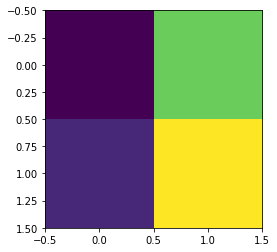

In [ ]:
###implement both nca and knn on grey set
t_start = time.time()
train_X_min = minimize_nca(train_X_grey_norm,train_Y_grey,30)
test_X_min = minimize_nca(test_X_grey_norm,test_Y_grey,30)
t_end = time.time()
print("Minimizing NCA execution time (seconds): ", t_end - t_start)

t_start = time.time()
predict_knn(test_X_min,train_X_min,test_Y_color,train_Y_color)
t_end = time.time()

print("KNN execution time (seconds): ", t_end - t_start)